### Imports

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [2]:
df = pd.read_csv('../../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df['target'].unique()

array([1, 0], dtype=int64)

### Checking for missing data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### EDA

<AxesSubplot:xlabel='target', ylabel='count'>

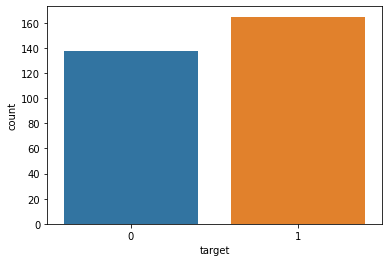

In [16]:
sns.countplot(x = 'target', data = df)

In [25]:
x = df[(df['sex'] == 1) & (df['target'] == 1)]['target'].count()
y = df[(df['sex'] == 0) & (df['target'] == 1)]['target'].count()


In [26]:
x, y

(93, 72)

<AxesSubplot:>

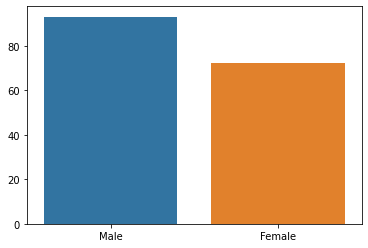

In [29]:
sns.barplot(data = df, x = ['Male', 'Female'], y = [x, y])
# Proportion of heart disease in male is more than women

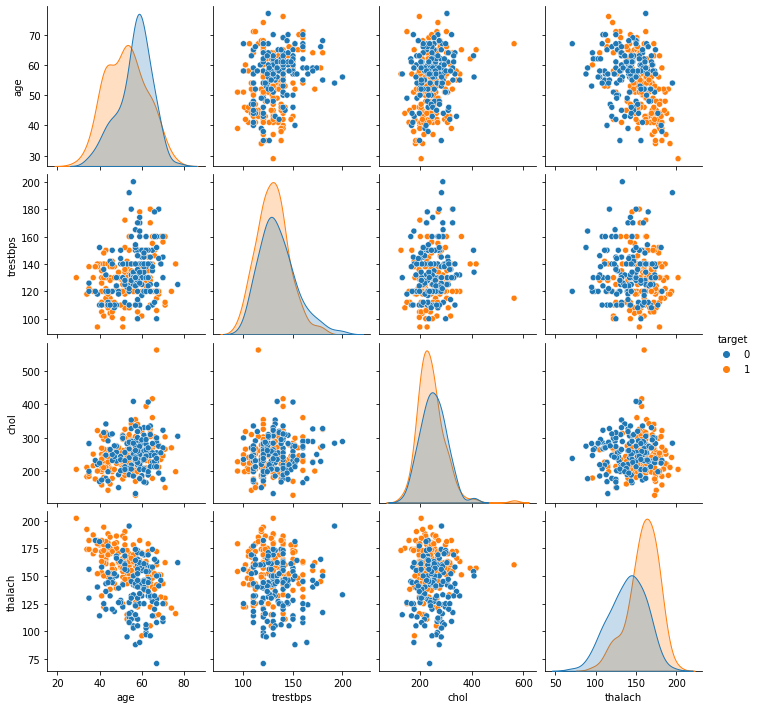

In [32]:
sns.pairplot(data = df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue = 'target')

- Can be observed that higher heart rate corresponds to higher heart disease -> 16 graph
- Ages less than 60 have higher tendency to get a heart attack
- Ages greater than 60 tend to have a higher rest bps but are not prone to heart disease


<AxesSubplot:>

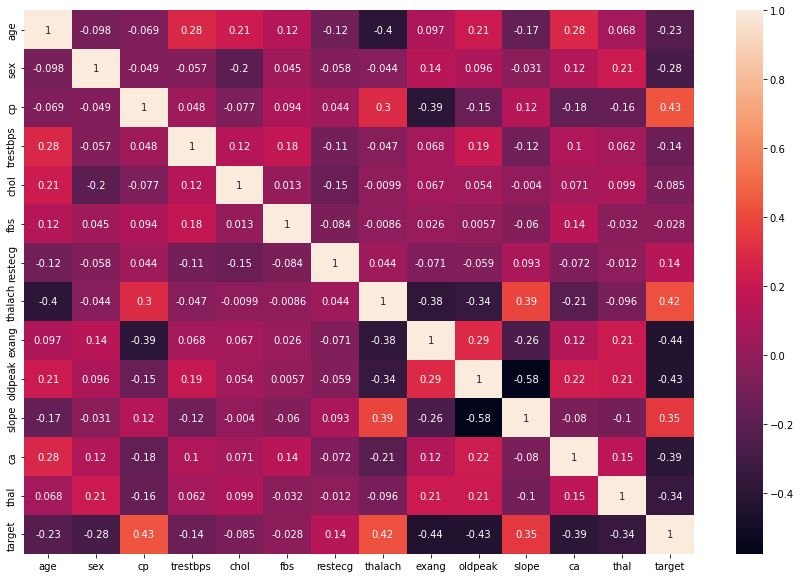

In [35]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)

In [37]:
df[(df['age'] < 60 ) & df['target'] == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [40]:
df[(df['age'] > 60 ) & df['target'] == 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
31,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1


### Train | Test Split and Scaling

In [42]:
X = df.drop('target', axis = 1)
y = df['target']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [57]:
log_model = LogisticRegression(max_iter = 5000, solver = 'saga')

In [153]:
l1_ratio = np.linspace(0, 1, 10)
param_grid = {'penalty' : ['l1', '12', 'elasticnet'], 'l1_ratio' : l1_ratio}

In [154]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [163]:
grid_model.fit(scaled_X_train, y_train)

c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_lo

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', '12', 'elasticnet']})

In [156]:
best_model = grid_model.best_estimator_

In [115]:
coef = best_model.coef_

In [117]:
coefs = pd.Series(index = X.columns, data = coef[0])

In [164]:
coefs.sort_values()

age        -0.703990
sex        -0.635351
cp         -0.621595
trestbps   -0.585110
chol       -0.560355
fbs        -0.514987
restecg    -0.035869
thalach    -0.005379
exang       0.248427
oldpeak     0.257846
slope       0.266909
ca          0.588277
thal        0.909244
dtype: float64

<AxesSubplot:>

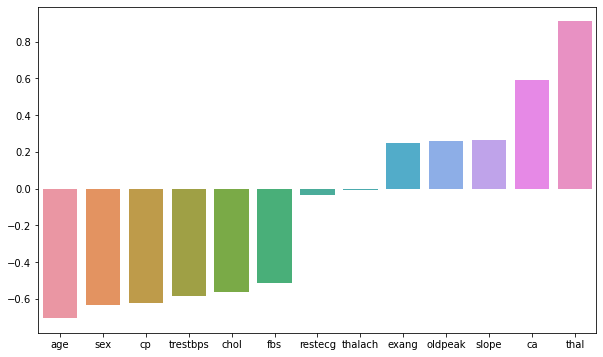

In [165]:
plt.figure(figsize = (10, 6))
sns.barplot(x = coefs.index, y = coefs.values)

In [166]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [167]:
y_pred = grid_model.predict(scaled_X_test)

In [168]:
len(scaled_X_test)

91

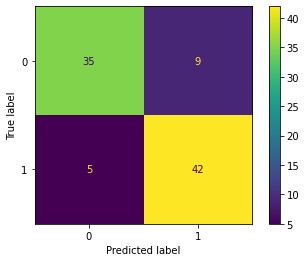

In [169]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



### Performance Curves

In [130]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

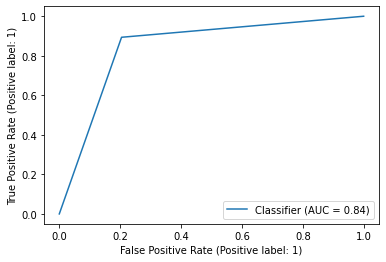

In [170]:
RocCurveDisplay.from_predictions(y_test, y_pred)

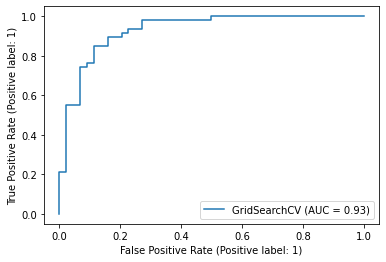

In [171]:
RocCurveDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [158]:
from sklearn.linear_model import LogisticRegressionCV

In [159]:
log_model = LogisticRegressionCV()

In [173]:
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [162]:
log_model.coef_

array([[ 0.22544842, -0.62140661,  0.52532874, -0.11377319, -0.0431398 ,
        -0.47855102,  0.26390403,  0.75577702, -0.4869106 , -0.5295191 ,
         0.29853262, -0.54348036, -0.54363015]])

In [175]:
y_pred = log_model.predict(scaled_X_test)

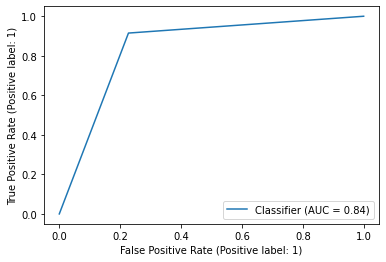

In [176]:
RocCurveDisplay.from_predictions(y_test, y_pred)

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83        44
           1       0.81      0.91      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91

